#Fakhri Kamil
#20337015
Visualisasi Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


#Import Dataset dan Library


#Indikator Kunci Pribadi Penyakit Jantung
#Deskripsi Data
Dilansir dari CDC, penyakit jantung adalah salah satu penyebab utama kematian bagi sebagian besar ras di AS (Afrika Amerika, Indian Amerika dan Penduduk Asli Alaska, dan orang kulit putih). Sekitar separuh penduduk Amerika atau (47%) setidaknya memiliki 1 dari 3 faktor yang resiko utama menderita penyakit jantung: tekanan darah tinggi, kolesterol tinggi, dan merokok. Indikator lain yang dapat menjadi faktornya: status diabetes, obesitas (BMI tinggi), kurang melakukan aktivitas fisik, atau minum terlalu banyak alkohol. Mengidentifikasi penyebab faktor terbesar yang berdmpak terhadap penyakit jantung sangat penting, untuk mencegah keparahan yang diakibatkan oleh penyakit jantung.

Sumber : https://www.cdc.gov/heartdisease/risk_factors.htm#print

In [ ]:
dataHeart= pd.read_csv("/content/drive/MyDrive/Dataset/heart_2020_cleaned.csv")
dataHeart


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

<Axes: >

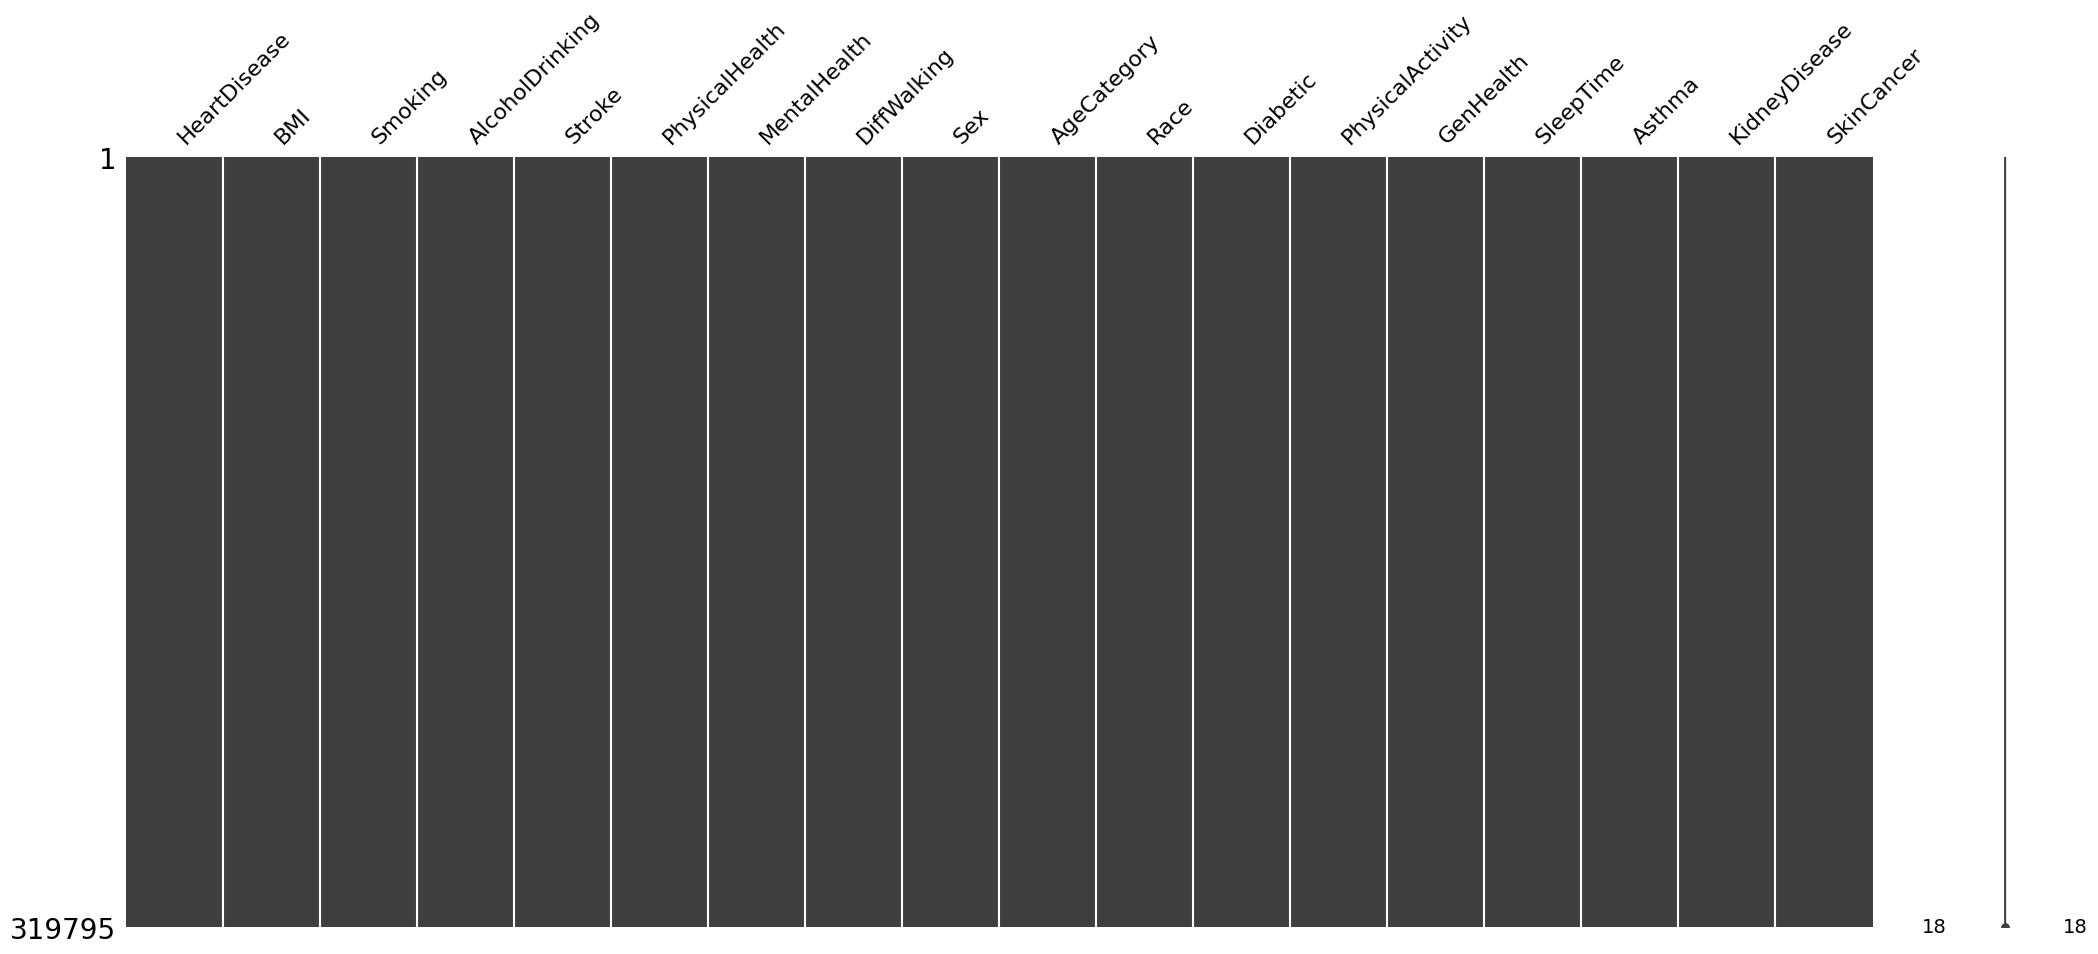

In [ ]:
import missingno as msno
msno.matrix(dataHeart)

Dari grafik diatas dapat bermakna bahwa tidak terdapat data hingalng atau NA pada objek dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataHeart1 = dataHeart.copy(deep = True)


col = list(dataHeart.columns)
categorical_features = []
numerical_features = []
for i in dataHeart1.columns:
    if len(dataHeart[i].unique()) > 6:
        numerical_features.append(i)
    else:
        dataHeart1[i]=le.fit_transform(dataHeart1[i])
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : HeartDisease Smoking AlcoholDrinking Stroke DiffWalking Sex Race Diabetic PhysicalActivity GenHealth Asthma KidneyDisease SkinCancer
Numerical Features : BMI PhysicalHealth MentalHealth AgeCategory SleepTime


 Mengidentifikasi dan memisahkan kolom dalam DataFrame menjadi dua kategori: seleksi fitur numerik dan kategorikal. Fitur kategorikal dikodekan menggunakan LabelEncoder, yang mengubahnya menjadi representasi numerik. Pada seleksi ini variabel yang meimiliki nilai unik lebih dari 6 maka akan dikategorikan kedalam variabel numerik, selain itu akan dikategorikan dalam data kategorik.

In [ ]:
dataHeart1['id'] = range(1, len(dataHeart) + 1)

In [ ]:
dataHeart

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [ ]:
import pandas as pd

def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)

    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2

    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return float(age_min) + 10  # treats '80 or older' as 90

    return float(age)  # or any other default value you prefer

dataHeart1['AgeCategory'] = dataHeart1['AgeCategory'].apply(convert_age_range_to_mean)

In [ ]:
print(dataHeart1.head())

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0         57.0     5         2   
1           0.0            0    0         90.0     5         0   
2          30.0            0    1         67.0     5         2   
3           0.0            0    0         77.0     5         0   
4           0.0            1    0         42.0     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  \
0                 1          4        5.0       1              0  

Mendefinisikan variabel AgeCategory yang semula memilikiki interval menjadi diskrit

In [ ]:
dataHeart.shape

(319795, 18)

#Personal Key Indicator of Heart Disease
* Objek/ Amatan
Dataset yang dijelaskan oleh CDC: "Didirikan pada tahun 1984 di 15 negara bagian, BRFSS kini mengumpulkan data di seluruh 50 negara bagian serta District of Columbia dan tiga wilayah AS. BRFSS menyelesaikan lebih dari 400.000 wawancara orang dewasa setiap tahunnya.

* Variabel :
1.   HeartDisease : Riwayat enyakit jantung (ya/tidak)
2.   BMI : Indeks Massa Tubuh
3.   Smoking: Pernahkah Anda merokok setidaknya 100 batang (ya/tidak)
4.   AlcoholDrinking : Peminum berat (pria dewasa minum lebih dari 14 minuman/minggu dan wanita dewasa minum lebih dari 7 minuman/minggu) (ya/tidak)
5.   Stroke : Pernah menderita stroke (ya/tidak)
6.   PhysicalHealth : Penyakit dan cedera fisik, selama berapa hari selama 30 hari terakhir
7.   MentalHealth : Kesehatan mental Anda, berapa hari dalam 30 hari terakhir
8.   DiffWalking : mengalami kesulitan serius dalam berjalan atau menaiki tangga
9.   Sex : (Pria/wanita)
10.  Umur : - 55-59
            - 60-64
            - 65-69
            - 70-74
            - 75-79
            - 80- older
11.  Race : Ras atau etnik
12.  Diabetic : Riwayat Diabetes
13.  PhysicalActivity : Aktivitas fisik orang dewasa diluar waktu kerja
14.  GenHealth : Kesehatan secara umum
15.  SleepTime : Rata-rata waktu tidur
16.  Asma : Riwayat asma
17.  KidneyDisease : Penyakit Ginjal
18.  SkinCancer : Kanker kulit

        







In [ ]:
dataHeart.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [ ]:
dataHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Data Personal Key Indicator of Heart Disease yang telah dipisahkan antar variabel numerik dan kategorik berdasarkan pada bagian sebelumnya, terdapat 4 variabel atau atribut yang memiliki tipe data float dan 14 variabel memiliki tipe data objek atau character.

In [ ]:
dataHeart.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

#Statistik Deskriptif Data

1.   Nilai Statistik Deskriptif dari dataset Personal Key Indicator of Heart Disease hanya menampilkan variabel yang bernilai numerik atau integer, diantaranya variabel berikut:
*   BMI
*   PhysicalHealth
*   MentalHealth
*   SleepTime

2.  Jumlah objek amatan untuk data Personal Key Indicator of Heart Disease sebanyak 319795.000000 amatan.
3.  Nilai maksimum dari variabel BMI Aadalah 94.85 .Sebanyak 239846250000 objek data variabel BMI kurang dari 31.42 yang artinya sebagian besar objek amatan variabel BMI kurang dari 31.42
4.  Jangkauan antar kuartil dari variabel BMI adalah 7.29, sehingga nilai objek yang lebih besar dari 42.35 merupakan nilai outlier atau pencilan yang terdiri dari beberapa objek.
5.  Ragam dari data variabel BMI yang terdapat outlier cendrung besar, dengan demikian semakin besar pula variasi dari data yang mengindikasikan objek data semakin jauh dari nilai rata-rata.      
6.  Berdasarkan jangkauan yang ada pada variabel PhysicalHealth, MentallHealth, dan, SleepTime memiliki ragam data yang besar sehingga juga berpengaruh pada besarnya variasi data. Setiap variabel memilki outlier atau pencilan, akan tetapi variabel BMI memiliki pencilan yang lebih banyak diabandingkan dengan variabel lainnya.


    



#Visualisasi Data dengan Pandas
#Scatter plot


*   Scatter plot merupakan salah satu jenis visualisasi data yang digunakan untuk melihat hubungan antara 2 variabel.
*   Visualisasi data jenis ini berguna untuk menggambarkan hubungan yang ada antar variabel dan dapat digunakan untuk mengidentifikasi tren atau korelasi antar variabel yang ada dalam data.
*   Scatter plot sangat efektif digunakan ketika memiliki data yang besar atai Big Data. Dikarenakan dapat memvisualisasikan titik data yang dapat mudah dilihat tren ketika memiliki banyak data.





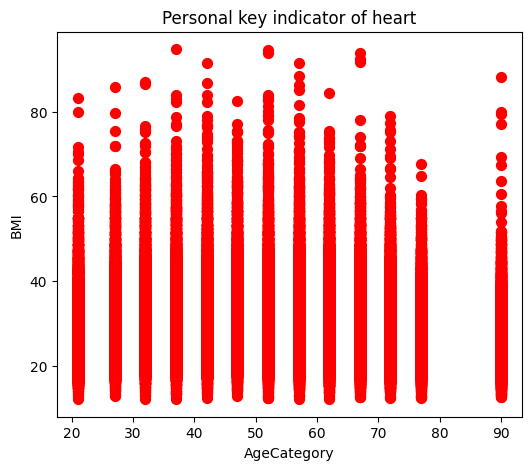

In [ ]:
sc_plot= dataHeart1.plot.scatter(x= 'AgeCategory', y= 'BMI', c= 'red', title= 'Personal key indicator of heart', s= 50, figsize= (6,5))

Output: Tidak terdapat tren yang memiliki korelasai positif atau negatif, oleh karena itu variabel AgeCategory dan BMI tidak memiliki korelasi satu saa lain.

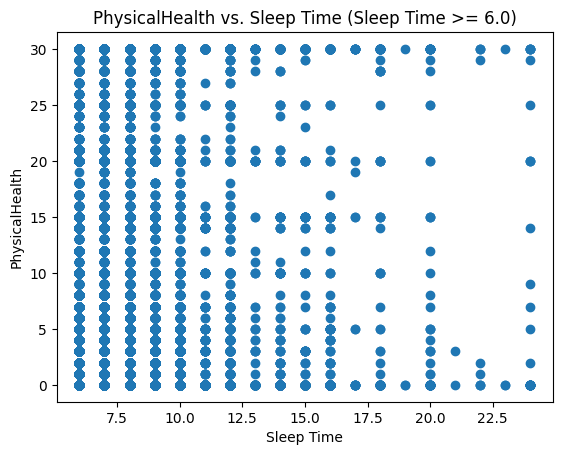

In [ ]:
# Filter the data where SleepTime is greater than or equal to 6.0
filtered_data = dataHeart[dataHeart['SleepTime'] >= 6.0]

# Create a scatter plot of BMI
plt.scatter(filtered_data['SleepTime'], filtered_data['PhysicalHealth'])

# Add labels and title
plt.xlabel('Sleep Time')
plt.ylabel('PhysicalHealth')
plt.title('PhysicalHealth vs. Sleep Time (Sleep Time >= 6.0)')

# Show the plot
plt.show()

Sebaran data yang terdapat pada grafik scatter plot variabel physical health dan sleep time yang lebih dari enam jam tidak mengindikasikan adanya hubungan antar variabel.  

In [ ]:
filtered_data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
5               Yes  28.87     Yes              No     No             6.0   
...             ...    ...     ...             ...    ...             ...   
319789           No  22.22      No              No     No             0.0   
319790          Yes  27.41     Yes              No     No             7.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
5                0.0         Yes  Female        75-79     Black       No   
...              ...         ...     ...          ...       ...      ...   
319789           0.0          No  Female        18-24  Hispanic       No   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
5                    No       Fair       12.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319789              Yes  Excellent        8.0     No            No         No  
319790               No       Fair        6.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[289530 rows x 18 columns]

#Line Chart

*   Line chart merupakan grafik yang menampilkan informasi serial atua data yang ditampilkan secara berurutan berupa point yang dihubungkan dengan garis lurus atau kurva variabel dataset pada sumbu X dan Y.
*   Grafik ini sering digunakan untuk memvisualisasikan tren dalam data selama interval waktu tertentu, dan garis biasanya digambar secara berurutan.
*   Contoh line chart digunakan dalam keuangan untuk menggambarkan pergerakan harga historis dari aset atau sekuritas.

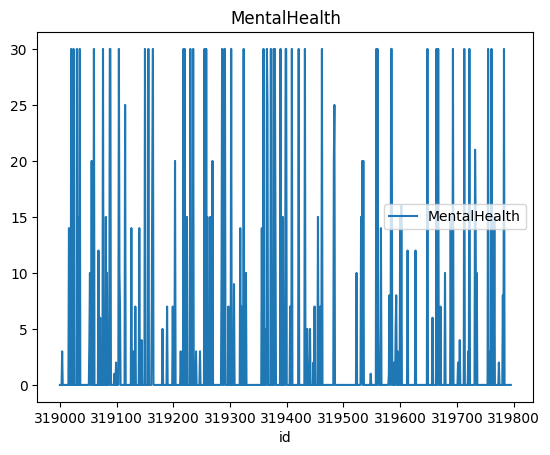

In [ ]:
filtered_data1 = dataHeart1[dataHeart1['id'] >= 319000]
dataHeart_plot_line= filtered_data1.plot.line(x= "id" ,y= "MentalHealth", title= 'MentalHealth')

Output: Visualisasi variabel mental health dengan id lebih besar dari 319000. Pergerakan dari variabel yang cendrung fluktiatif pada setiap objek data id.

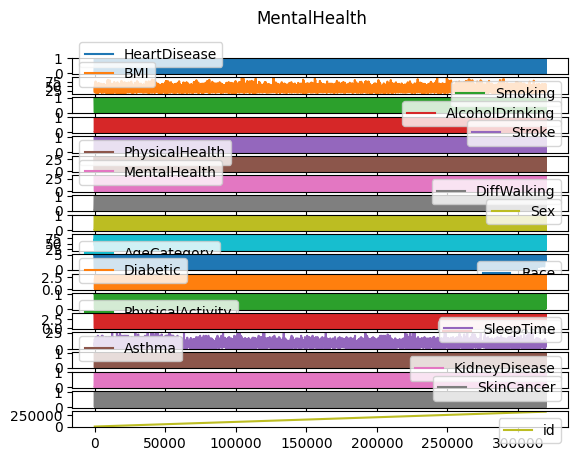

In [ ]:
dataHeart1_plot_line= dataHeart1.plot.line(subplots= True, title= 'MentalHealth')

#Histogram

*   Histogram menggambarkan distribusi dataset dengan interval kontinu atau periodie tertentu.
*   Histogram digunakan untuk visualisasi data dengan tipe numerik
*   Visualisasi ini bertujuan untuk mengidentifikasi di mana data terkonsentrasi pada interval tertentu, serta di mana terdapat kesenjangan sebaran data yang tidak biasa.


<Axes: title={'center': 'Body Mass Index'}, ylabel='Frequency'>

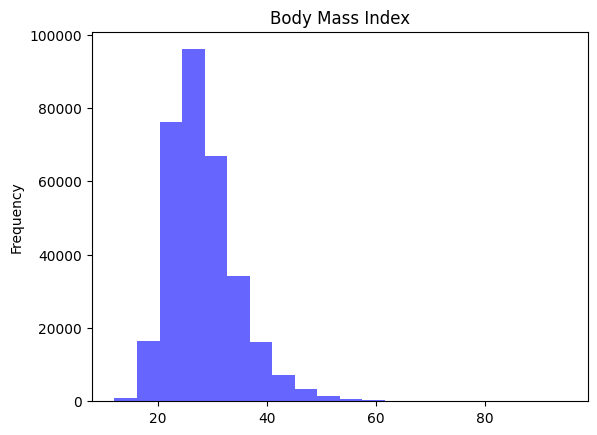

In [ ]:
dataHeart1['BMI'].plot.hist(color='blue', bins=20, alpha=0.6, title='Body Mass Index')

Output: Sebatran data variabel BMI cendrung terpusat pada rentang 25-30 yang memiliki amatan terbanyak. Distribusi data termasuk yang kemiringan atau skewness ke kanan.

<Axes: title={'center': 'PhysicalHealth'}, ylabel='Frequency'>

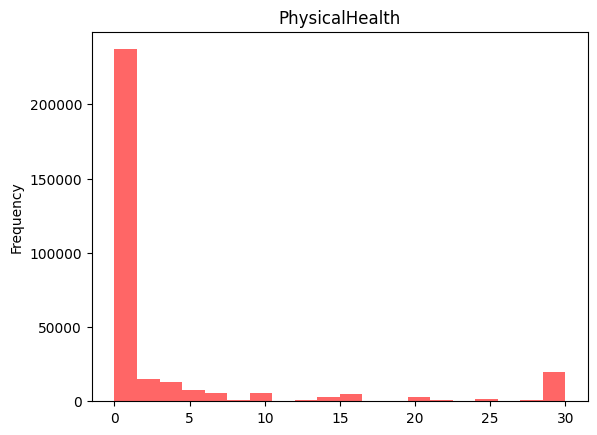

In [ ]:
dataHeart1['PhysicalHealth'].plot.hist(color='red', bins=20, alpha=0.6, title='PhysicalHealth')

Output: sebaran data atau ragam yang buruk dengan adannya nilai ekstrim dari data physical health

<Axes: title={'center': 'MentalHealth'}, ylabel='Frequency'>

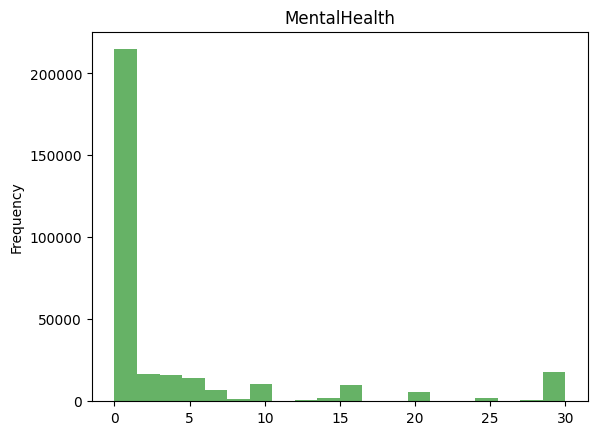

In [ ]:
dataHeart1['MentalHealth'].plot.hist(color='green', bins=20, alpha=0.6, title='MentalHealth')

Output: sebaran data atau ragam yang besar hal ini dikarenakan adanya amatan yang jauh berada kebanyakan data atau meiliki data ekstrim

<Axes: title={'center': 'SleepTime'}, ylabel='Frequency'>

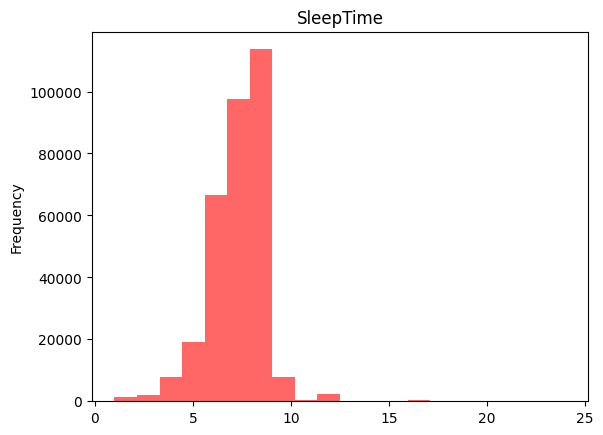

In [ ]:
dataHeart1['SleepTime'].plot.hist(color='red', bins=20, alpha=0.6, title='SleepTime')

Output: Data cendrung terpusat atau memiliki ragam yang kecil pada interval 6-8, dengan kemiringan grafik yang cendrung ke kiri.

<Axes: title={'center': 'Body Mass Index'}, xlabel='Frequency'>

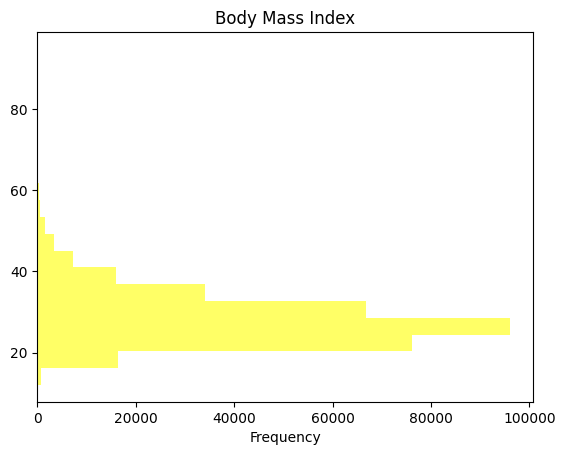

In [ ]:
dataHeart['BMI'].plot.hist(color='yellow', bins=20, alpha=0.6, title='Body Mass Index',orientation='horizontal')

#Bar Chart


*   Bar chart atau diagram batang salah satu metode visualisasi data yang sering digunakan.
*   Bar chart biasanya digunakan untuk membandingkan data dari kategori yang berbeda,sumbu horizontal pada bagan menunjukkan kategori yang dibandingkan, dan sumbu lainnya menunjukkan nilai terukur.
*   Salah satu kelemahannya adalah pelabelan dan kejelasan dapat menjadi masalah jika terlalu banyak kategori yang dimasukkan.

<Axes: >

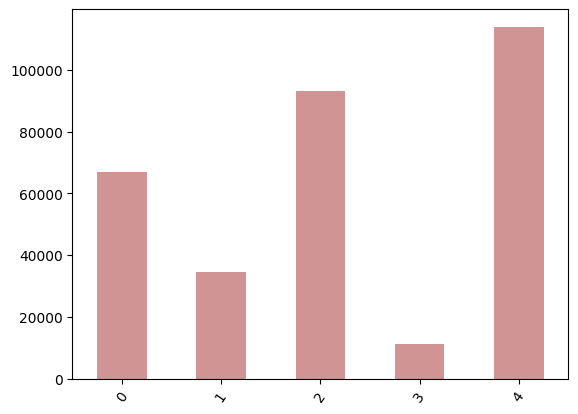

In [ ]:
  dataHeart1['GenHealth'].value_counts().sort_index().plot.bar(color='brown', alpha=0.5, rot=55)

Output: Variabel GenHealth denga tipe data nonimal yang membagi data menjadi 4 kategori. Kategori dengan jumlah terbanyak dengan kode 4, keterangan kesehatan secara umum yang sangat baik.

<Axes: >

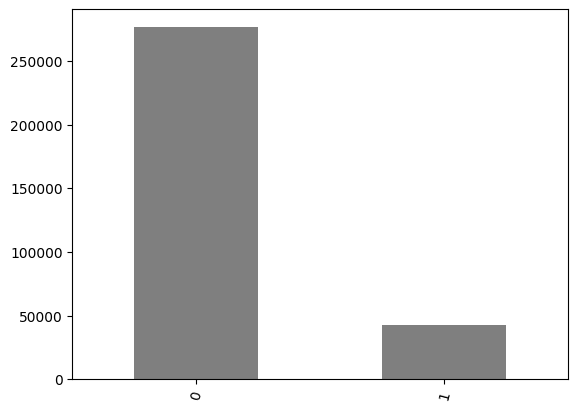

In [ ]:
dataHeart1['Asthma'].value_counts().sort_index().plot.bar(color='black', alpha=0.5, rot=75)

Output: variabel asma pada data indikator kunci penyakit jantung, amatan yang tidak pernah mengidap asma lebih banyak dibandingkan yang pernah mengidap asma.

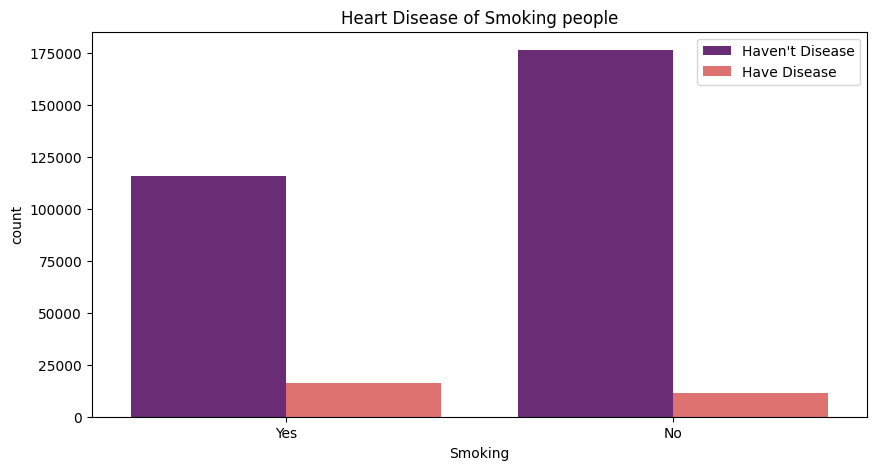

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=dataHeart,hue='HeartDisease',palette='magma')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

Output: Pasien yang mengidap penyakit jantung lebih besar merupakan seorang perokok diandingkan dengan yang bukan perokok. Hal ini menunujukkan menunjukkan bahwa orang yang merokok lebih cenderung menderita penyakit jantung daripada orang yang tidak merokok.  

In [ ]:
crosstable= dataHeart.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()
crosstable

AlcoholDrinking  HeartDisease
No               No              271786
                 Yes              26232
Yes              No               20636
                 Yes               1141
Name: HeartDisease, dtype: int64

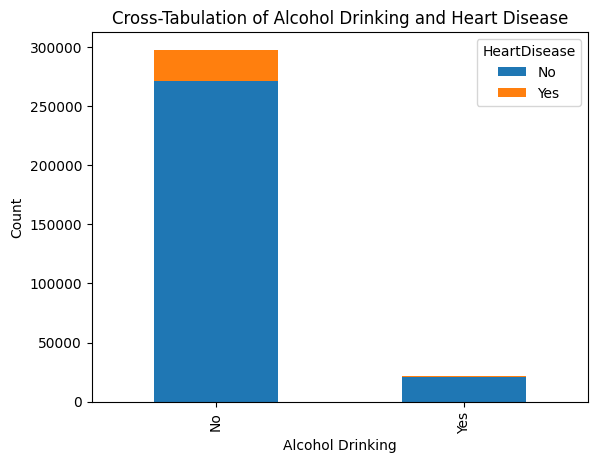

In [ ]:
# Convert the Series to a DataFrame
crosstable_df = crosstable.unstack()

# Plot the bar chart
crosstable_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Alcohol Drinking')
plt.ylabel('Count')
plt.title('Cross-Tabulation of Alcohol Drinking and Heart Disease')

# Show the chart
plt.show()

Output: Perbandingan jumlah sesorang merupakan yang orang yang tidak peminum berat lebih besar diabndingkan dengan berat peminum berat alkohol. Pasien yang tidak peminum berat mengalami penyakit jantung yang lebih banyak dibandingkan seseorang peminum berat alkohol.

In [ ]:
HeartDisease_yes = dataHeart.query("HeartDisease == 'Yes'")
HeartDisease_yes.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
5           Yes  28.87     Yes              No     No             6.0   
10          Yes  34.30     Yes              No     No            30.0   
35          Yes  32.98     Yes              No    Yes            10.0   
42          Yes  25.06      No              No     No             0.0   
43          Yes  30.23     Yes              No     No             6.0   

    MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
5            0.0         Yes  Female        75-79  Black       No   
10           0.0         Yes    Male        60-64  White      Yes   
35           0.0         Yes    Male        75-79  White      Yes   
42           0.0         Yes  Female  80 or older  White      Yes   
43           2.0         Yes  Female        75-79  White      Yes   

   PhysicalActivity GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
5                No      Fair       12.0     No            No         No  
10               No      Poor       15.0    Yes            No         No  
35              Yes      Poor        4.0     No            No        Yes  
42               No      Good        7.0     No            No        Yes  
43              Yes      Fair        8.0     No           Yes         No

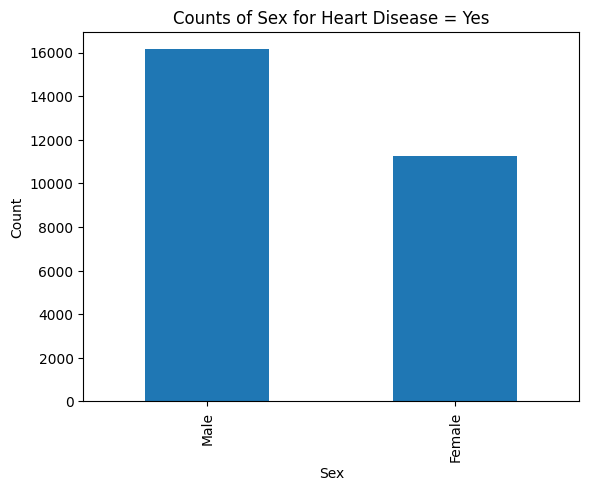

In [ ]:

sex_counts = HeartDisease_yes['Sex'].value_counts()


sex_counts.plot(kind='bar')


plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Sex for Heart Disease = Yes')


plt.show()

Output: beradasarkan dataset indikato kunci penyakit jantung, laki-laki lebih banyak menderita penyakit jantung dibandingkan dengan perempuan.

In [ ]:
fig = px.histogram(HeartDisease_yes, x = dataHeart['Diabetic'],
                      title = 'people had diabetic', text_auto = 'd3-format', template = 'plotly_dark')
fig.show()

Output: variabel diabetes yang termasuk kedalam dataset key indikator yang memiliki jumlah amatan terbanyak adalah seseorang yang tidak pernah memiliki riwayat penyakit diabeltes.

#Area

*   Grafik area, adalah variasi grafik garis dasar yang area di bawah garisnya diarsir untuk mewakili nilai total setiap objek data setiap variabel dengan tipe data numerik.
*   Metode visualisasi data ini berguna untuk menunjukkan perubahan dalam satu atau lebih besaran dari waktu ke waktu, serta menunjukkan bagaimana setiap besaran digabungkan untuk membentuk keseluruhan

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

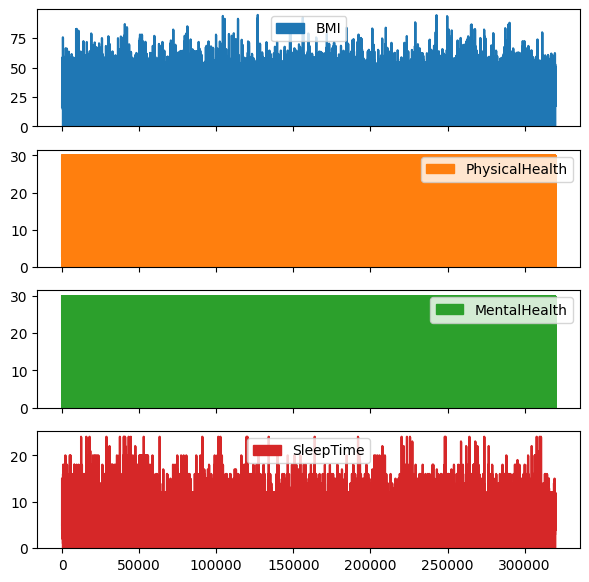

In [ ]:
dataHeart.plot.area(subplots=True,figsize=(7,7))

Variabel Physical Helath dan Mental Health memiliki bentuk grafik seperti persegi panjang dibandingkan dengan variabel lainnya, hal ini dikarenakan bahwa amatan data yang berjumlah sangat besar dengan keragaman yang kecil.

#Box dan Box Plot

*   Grafik ini memberikan informasi ringkasan visual data melalui kuartilnya. Kuartil pertama, sebuah kotak diambil dari kuartil pertama hingga kuartil ketiga dari kumpulan data.
*   Garis di dalam kotak mewakili median.  Kuartil 1 dan kuartil 3 ditarik garis memanjang dari kotak ke minimum (ekstrim bawah) dan maksimum (ekstrim atas).
*   Pencilan diwakili oleh titik-titik individual yang sejajar dengan nilai whiskers atas dan bawah.
*   Grafik ini bertujuan mengidentifikasi dengan cepat apakah suatu data simetris atau miring.


<Axes: >

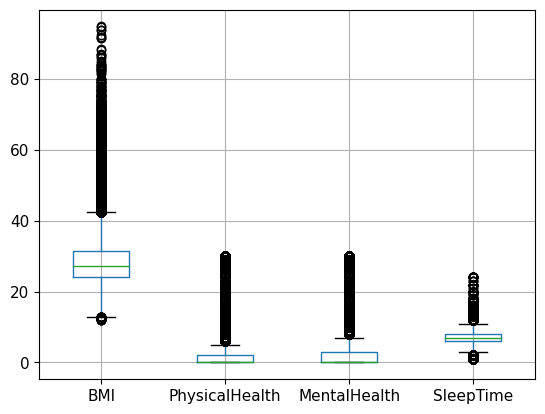

In [ ]:
dataHeart.boxplot(fontsize=11)

Berdasarkan jangkauan yang ada pada variabel PhysicalHealth, MentallHealth, dan, SleepTime memiliki ragam data yang besar sehingga juga berpengaruh pada besarnya variasi data. Variabel BMI, Physical Health, Mental Health dan, Sleep Time memilki outlier atau pencilan. Variabel BMI memiliki pencilan yang lebih banyak diabandingkan dengan variabel lainnya.

BMI                  Axes(0.125,0.11;0.168478x0.77)
PhysicalHealth    Axes(0.327174,0.11;0.168478x0.77)
MentalHealth      Axes(0.529348,0.11;0.168478x0.77)
SleepTime         Axes(0.731522,0.11;0.168478x0.77)
dtype: object

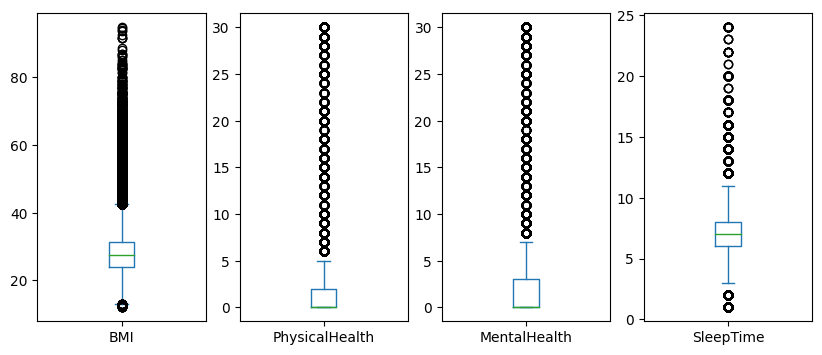

In [ ]:
dataHeart.plot(kind = "box", figsize = (10,4), subplots = True)

#Kernel Density Estimate Plot

*   Kernel Density Plot (KDE) adalah metode non-parametrik untuk memvisualisasikan distribusi probabilitas dari variabel dengan tipe data numerik.
*   KDE menghasilkan kurva yang menggambarkan distribusi probabilitas dari data. Kurva ini dihasilkan dengan menghitung estimasi dari probabilitas density (KDE) dari data setiap variabel
*   Visualisasi grafik KDE digunakan dalam analisis data untuk memvisualisasikan distribusi probabilitas dari variabel secara acak.  

<Axes: ylabel='Density'>

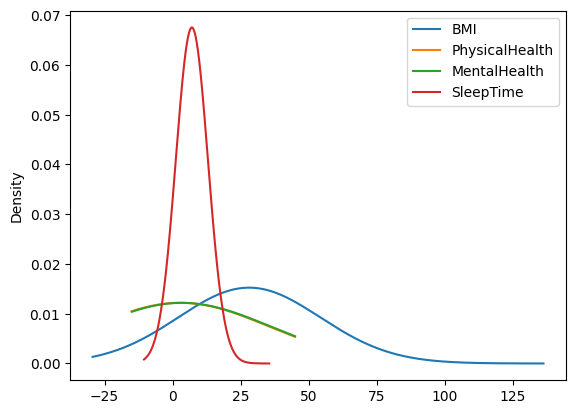

In [ ]:
dataHeart.plot.kde(bw_method=4)

<ipython-input-53-7a31d2c27a88>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-53-7a31d2c27a88>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-53-7a31d2c27a88>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

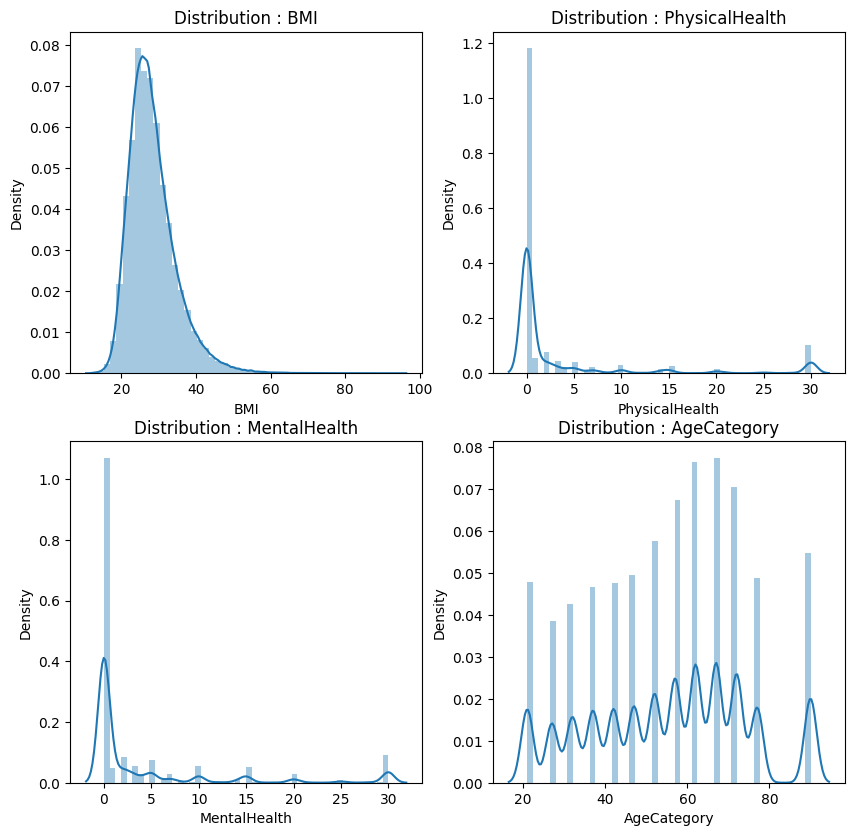

<ipython-input-53-7a31d2c27a88>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.




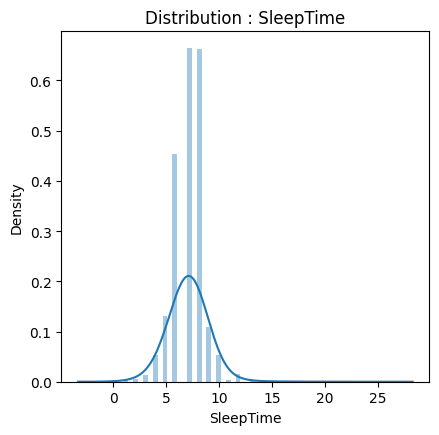

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(dataHeart1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(dataHeart1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

Output: Grafik KDE dengan probabilitas ter tinggi ada pada variabel BMI diandingkan dengan variabel lainnya. Meskipun peluang terjadi dalam kasus penyakit jantung pada variabel BMI yang kecil yaitu 0,08

#Pie Chart

*   Diagram lingkaran ideal untuk mengilustrasikan proporsi, atau perbandingan dari data dengan tipe kategorik.
*   Diagram lingkaran relatif sederhana dan mudah dibaca, diagram lingkaran ini paling cocok untuk memfokuskan pada kasus yang diambil.

In [ ]:
fig = px.pie(dataHeart, names = 'HeartDisease', title = 'the Ratio of Heart Disease', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

Output: 8 dari 100 orang pasien menderita penyakit jantung dan sisanya tidak pernah mengalami penyakit jantung.  

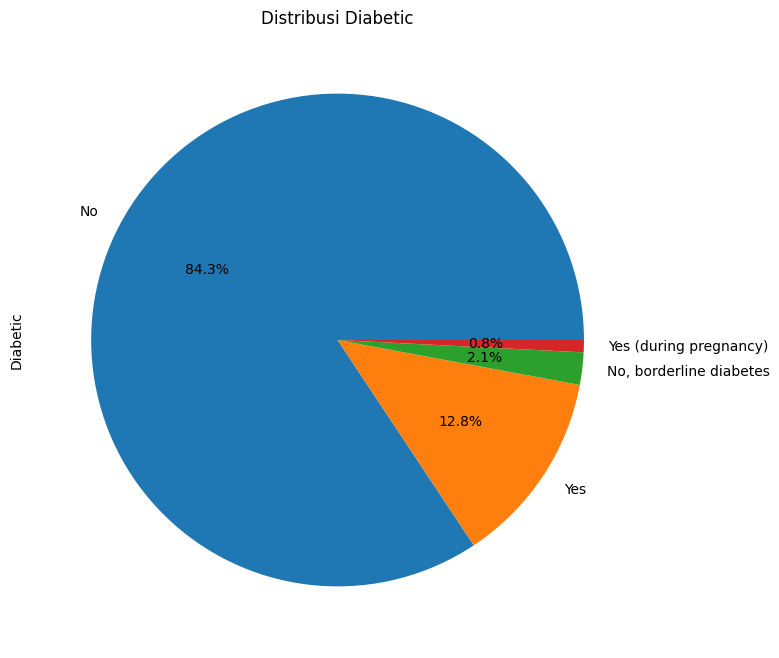

In [ ]:
Diabetic_counts = dataHeart['Diabetic'].value_counts()
HeartDisease_yes = Diabetic_counts.plot.pie(autopct='%1.1f%%', shadow=False, figsize=(10, 8))
plt.title('Distribusi Diabetic')
plt.show()


Output: Data Indikator kunci penyakit jantung yang menderita tidak diabetes lebih 7 kali lebih banyak dibandikan yang menderita diabetes. Sebanyak 0,8% diantaranya mengalami diabetes saat hamil.    

In [ ]:
fig = px.sunburst(dataHeart, path=['Smoking','HeartDisease']).update_traces(textinfo='label+percent parent')
fig.show()

Output: Perbandingan 12 dari 100 orang yang merokok menderita penyakit jantung, 2 kali lebih banyak dari orang yang tidak merokok. Sehingga dapat dikatakan merokok data menderita penyakit jantung.  

#Visualisasi Data dengan Matplotlib

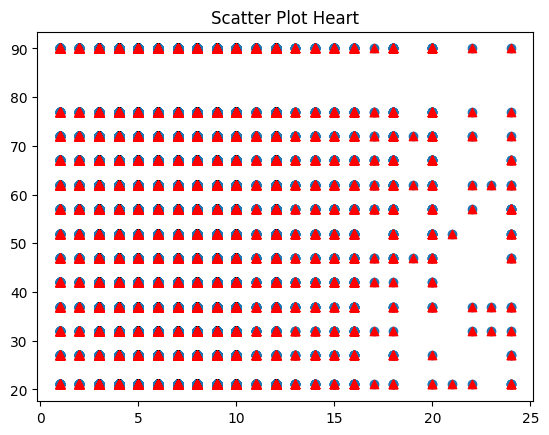

In [ ]:
x1= dataHeart['SleepTime']
x2= dataHeart1['AgeCategory']
plt.scatter(x1, x2)
plt.scatter(x1, x2, marker='^', color='r')
plt.title('Scatter Plot Heart')
plt.show()

[]

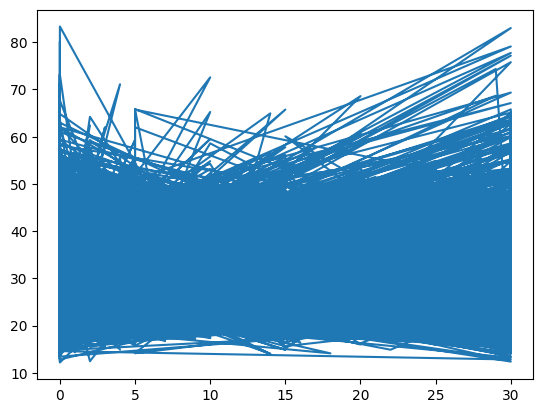

In [ ]:
HeartDisease_yes = dataHeart.query("HeartDisease == 'Yes'")
x = HeartDisease_yes['MentalHealth']
y= HeartDisease_yes['BMI']
plt.plot(x, y)
plt.plot()


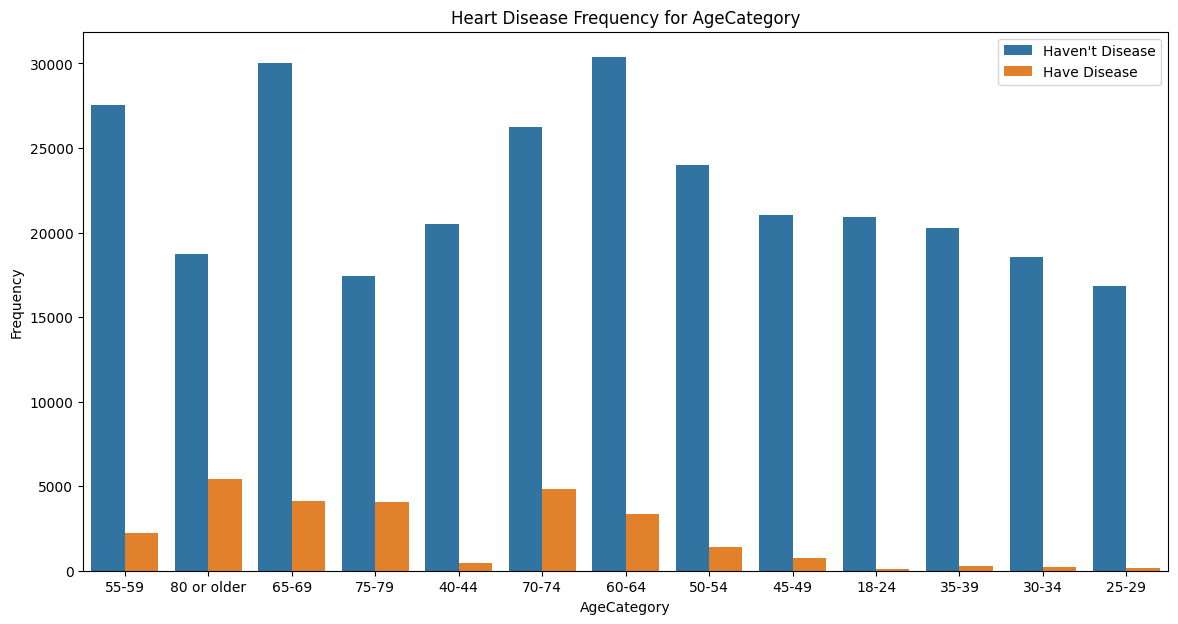

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data= dataHeart, hue='HeartDisease')
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Output: Pasien dengna kategori umur 80 atau lebih  menderita penyakit jantung yang paling banyak, hal ini dikarenakan faktor kebugaran fisik yang sudah tua. Dan kategori umur dengan  penderita penyakit jantung terkecil terdapat pada kategori usia 25-29.

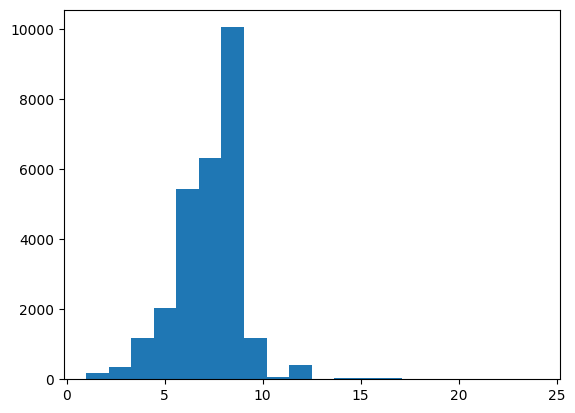

In [ ]:
m= HeartDisease_yes['SleepTime']
plt.hist(m, bins= 20)
plt.show()


Text(0.5, 1.0, 'Cross-Tabulation of GenHealth and HeartDisease')

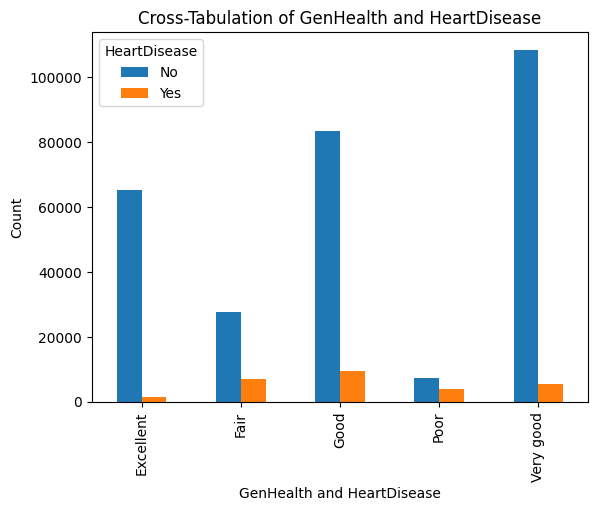

In [ ]:
crosstable1= dataHeart.groupby(['GenHealth','HeartDisease'])['HeartDisease'].count()
crosstable_df1 = crosstable1.unstack()

crosstable_df1.plot(kind='bar')
# Add labels and a title
plt.xlabel('GenHealth and HeartDisease')
plt.ylabel('Count')
plt.title('Cross-Tabulation of GenHealth and HeartDisease')

Output: kebugaran umum, pasien dengan kebugaran dengan kategori baik menderita penyakit jantung lebih banyak, dibandingkan dengan yang kategori lainnya. Kebugaran yang terbaik menderita panyakit jantung yang lebih kecil. Kebugaran menjadi kunci seseorang dapat menderita penyakit jantung.

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


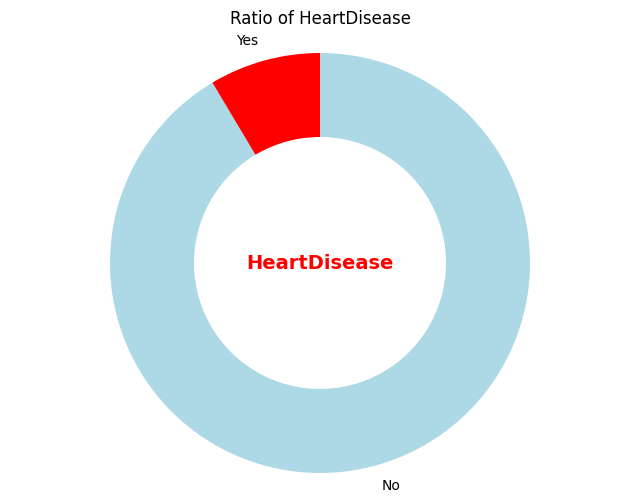

In [ ]:
heart_disease_counts = dataHeart['HeartDisease'].value_counts()
print(heart_disease_counts)

plt.figure(figsize=(8,6))
wedges, texts = plt.pie(heart_disease_counts, labels=heart_disease_counts.index, startangle=90,
        counterclock=False, wedgeprops={'width':0.4},colors=['lightBlue','Red'] )
plt.axis('equal')
plt.text(0, 0, 'HeartDisease', ha='center', va='center', fontsize=14, fontweight='bold', color='red')
plt.title('Ratio of HeartDisease')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

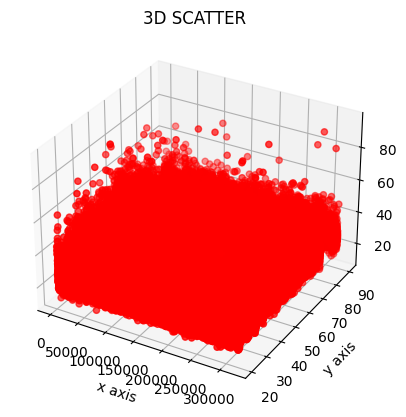

In [ ]:
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
x1= dataHeart1['id']
y1= dataHeart1['AgeCategory']
z1= dataHeart1['BMI']
ax.scatter(x1, y1, z1, c='r', marker= 'o', label= 'blue')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D SCATTER")
plt.show

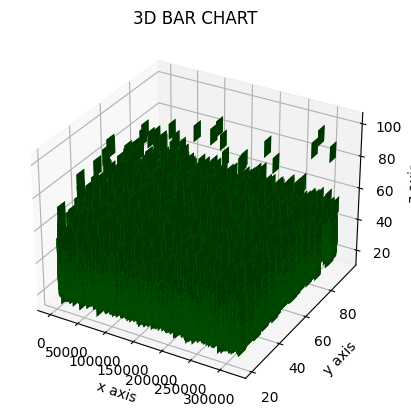

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = dataHeart1['id']
y1 = dataHeart1['AgeCategory']
z1 = dataHeart1['BMI']

# Specify the width of the bars in the x, y, and z directions.
dx = 5  # Adjust these values based on your data for the x-direction.
dy = 5  # Adjust these values based on your data for the y-direction.
dz = 10  # Adjust these values based on your data for the z-direction.

# Create the 3D bar chart.
ax.bar3d(x1, y1, z1, dx, dy, dz, color='g')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D BAR CHART")
plt.show()



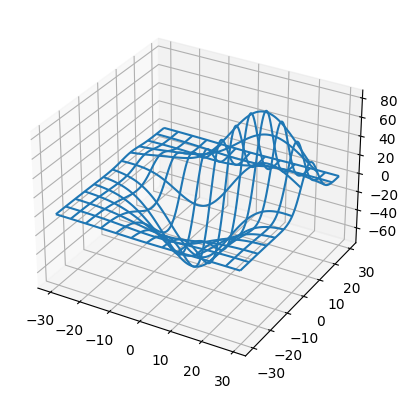

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

#Matriks Varian-kovarian

In [ ]:
dataHeart1.cov().style.background_gradient(cmap='coolwarm')


Output:
*   Variabel BMI memiliki variasi yang paling besar dengan nilai 40.400010 sehingga menjadikan ragam dari data yang besar, data sangat menyebar dan tidak berpusat pada sekitar rata-rata.
*   Kovarian terbesar dari data indikator kunci penyakit jantung terdapat antara variabel BMI dan physical health. Peningkatan nilai objek variaebl BMI diikuti variabel physical health atau disebut dengan korelasi positif dengan nilai 5.548267.

In [ ]:
dataHeart1.corr().style.background_gradient(cmap='coolwarm')

Output: Antara variabel physical health dan variabel dalfwalking memiliki korelasi sebesar 0.428 . Korelasi antara kedua variabel ini tergolong lemah akan tetapi memiliki indikasi hubungan antara Physical Health berpengaruh terhadap kekuatan seseorang dalam menaiki tangga.

#Mosaic Plot

In [ ]:
crosstable=pd.crosstab(dataHeart['HeartDisease'],dataHeart['Race'])
crosstable

Race          American Indian/Alaskan Native  Asian  Black  Hispanic  Other  \
HeartDisease                                                                  
No                                      4660   7802  21210     26003  10042   
Yes                                      542    266   1729      1443    886   

Race           White  
HeartDisease          
No            222705  
Yes            22507

(<Figure size 640x480 with 3 Axes>,
 {('No', 'White'): (0.0, 0.0, 0.9098552640882581, 0.7491026610879338),
  ('No', 'Black'): (0.0,
   0.7523813496125239,
   0.9098552640882581,
   0.0713431105798032),
  ('No', 'Asian'): (0.0,
   0.8270031487169173,
   0.9098552640882581,
   0.02624323190681867),
  ('No', 'American Indian/Alaskan Native'): (0.0,
   0.856525069148326,
   0.9098552640882581,
   0.01567462967005579),
  ('No', 'Other'): (0.0,
   0.875478387342972,
   0.9098552640882581,
   0.03377781784263952),
  ('No', 'Hispanic'): (0.0,
   0.9125348937102018,
   0.9098552640882581,
   0.08746510628979833),
  ('Yes', 'White'): (0.9148303884663676,
   0.0,
   0.0851696115336325,
   0.8087543486970828),
  ('Yes', 'Black'): (0.9148303884663676,
   0.812033037221673,
   0.0851696115336325,
   0.06212894961111013),
  ('Yes', 'Asian'): (0.9148303884663676,
   0.8774406753573734,
   0.0851696115336325,
   0.009558299940170772),
  ('Yes', 'American Indian/Alaskan Native'): (0.9148303884663676,
  

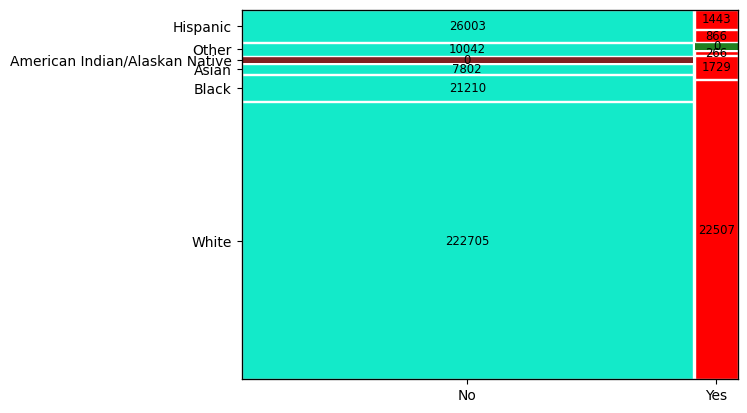

In [ ]:
props={}
props[('Yes','Native')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Asian')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Black')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Hispanic')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Other')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','White')]={'facecolor':'red', 'edgecolor':'white'}
props[('No','Native')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Asian')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Black')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Hispanic')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Other')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','White')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
labelizer=lambda k:{('Yes','Native'):542,('No','Native'):4660,('Yes','Asian'):266,('No','Asian'):7802,('Yes','Black'): 1729,('No','Black'):21210,('Yes','Hispanic'): 1443, ('No','Hispanic'): 26003, ('Yes','Other'): 866, ('No','Other'): 10042, ('Yes','White'):22507, ('No','White'): 222705, ('Yes', 'American Indian/Alaskan Native'): 0, ('No', 'American Indian/Alaskan Native'): 0 }[k]
mosaic(dataHeart,['HeartDisease','Race'],labelizer=labelizer,properties=props)

Output: Amatan terbesar yang menderita penyakit jantung berasal dari ras putih sebanyak 222705 amatan. Tidak terdapat amatan yang memiliki penyakit jantung dan tidak pada ras American Indian/ Alaskan native, dikarenakan datanya yang tidak ada.